In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Arquivo de Entrada
- Nome: 'unidades.csv'
- Formato: csv
- Delimitador: Ponto e vírgula (;)
- Decimal: Vírgula (,)
- Colunas:
 
| Coluna      | Tipo        | Descrição                    |
| ----------- | ----------- | ---------------------------- |
| category    | String      | Contém a categoria, sub-categoria e o preço da unidade. (Ex:  Casa / Padrão em São Carlos Alugar por R$2.500,00)                                     |
| location    | String      | Contém a localização da unidade, geralmente é o nome do bairro ou do condomínio |
| description | String      | Código da unidade seguido de uma breve descrição sobre a unidade. (Ex: Cód. 107502 - Imóvel em ótima localização ao l...)                                 |
| price       | Float64     | Preço de locação da unidade.     |
| area        | Object      | Área da unidade acompanhada da unidade métrica. (Ex: 180.00 M²) |
| bathrooms   | Int         | Número de banheiros da unidade.      |
| bedrooms    | Int         | Número de quartos da unidade. |

In [2]:
df = pd.read_csv('unidades.csv', encoding = "ISO-8859-1", delimiter = ';', decimal=",")

In [3]:
df.head()

,category,location,description,price,area,bathrooms,bedrooms
0,Apartamento / Padrão em São Carlos Alugar por ...,Jardim Gibertoni,Cód. 107539 - IPTU 2021 pago. Imóvel novo em ó...,900.00,49.00 M²,1.0,2.0
1,"Casa / Padrão em São Carlos Alugar por R$890,00",Parque Primavera,Cód. 107538 - .,890.00,NaN,1.0,1.0
2,"Casa / Padrão em São Carlos Alugar por R$1.001,16",Jardim Nova Sao Carlos,Cód. 107536 - .,1001.16,NaN,1.0,1.0
3,Apartamento / Padrão em São Carlos Alugar por ...,Jardim Macarengo,Cód. 107534 - .,954.77,94.90 M²,1.0,3.0
4,"Casa / Padrão em São Carlos Alugar por R$1.045,00",Vila Boa Vista 1,Cód. 107533 - .,1045.00,NaN,1.0,1.0


In [4]:
df.describe()

,price,bathrooms,bedrooms
count,1636.000000,1603.000000,1565.000000
mean,1349.196895,1.154710,1.866454
std,2178.734987,0.541437,0.814310
min,334.000000,1.000000,1.000000
25%,778.000000,1.000000,1.000000
50%,974.210000,1.000000,2.000000
75%,1335.117500,1.000000,2.000000
max,60000.000000,5.000000,5.000000


# Tratamento dos Dados

Fazendo uma série de tratamento dos dados, você pode ignorar isso, se quiser:

In [5]:
# Removendo rows que contém algum NA em uma das cols
df = df.dropna()

# Formatando os valores da col 'area', removendo o M2 e convertendo para tipo float
df['area'] = df['area'].map(lambda x: x.rstrip(' M²'))
df['area'] = df['area'].astype(float)

# Separando o código da unidade de seua descrição
# code -> código da unidade
# description -> descrição breve sobre a unidade
df[['code', 'description']] = df['description'].str.split(' - ', 1, expand=True)

# Formatando os valores da col 'code' e convertendo para int
df['code'] = df['code'].str.extract('(\d+)')
df['code'] = df['code'].astype(int)

# Separando a categoria e sub-categoria da unidade do título da unidade
# title -> Texto sem utilizada, normalmente como anúncio com o preço da unidade.
# category -> categoria, ex: Casa, Apartamento
# sub_category -> sub-categoria, ex: Condomínio, Duplex
df[['category', 'title']] = df['category'].str.split(' / ', 1, expand=True)
df[['sub_category']] = df['title'].str.split().str.get(0)

# Criando uma nova coluna para fatorizar as categorias e sub-categorias, que são strings
# category_int -> inteiro associado a um tipo de categoria
# sub_category_int -> inteiro associado a um tipo de sub-categoria
df['category_int'] = pd.factorize(df['category'])[0]
df['sub_category_int'] = pd.factorize(df['sub_category'])[0]

# Criando nova col 'rooms' composta pela soma de 'bedrooms' e 'bathrooms'
# rooms -> número de quartos + número de banheiros
df['rooms'] = df['bedrooms'] + df['bathrooms']

# Filtrando alguns outliers
df = df[df['area'] < 10000]
df['category'] = df[(df['category'] != 'Comercial') & (df['category'] != 'Rural')]

# Re-organizando as colunas para ficar mais legível
cols = ['category',
        'sub_category',
        'location',
        'description',
        'price',
        'area',
        'bathrooms',
        'bedrooms',
        'rooms',
        'code',
        'title',
        'sub_category_int',
        'category_int']
df = df[cols]

# Vendo a zona que criamos
df.head()

,category,sub_category,location,description,price,area,bathrooms,bedrooms,rooms,code,title,sub_category_int,category_int
0,Apartamento,Padrão,Jardim Gibertoni,IPTU 2021 pago. Imóvel novo em ótima localizaç...,900.00,49.0,1.0,2.0,3.0,107539,"Padrão em São Carlos Alugar por R$900,00",0,0
3,Apartamento,Padrão,Jardim Macarengo,.,954.77,94.9,1.0,3.0,4.0,107534,"Padrão em São Carlos Alugar por R$954,77",0,0
5,Casa,Condomínio,Condominio Residencial Village Damha I,Lindo sobrado com 200m² de área construída em ...,3900.00,200.0,1.0,3.0,4.0,107532,"Condomínio em São Carlos Alugar por R$3.900,00",1,1
6,Apartamento,Padrão,Jardim Ricetti,.,870.00,48.0,1.0,3.0,4.0,107530,"Padrão em São Carlos Alugar por R$870,00",0,0
10,Apartamento,Padrão,Parque Arnold Schimidt,"Acabamento em porcelanato, sal com painel de t...",1334.00,39.0,1.0,1.0,2.0,107524,"Padrão em São Carlos Alugar por R$1.334,00",0,0


# Breve análise e visualização dos dados

Realmente é breve. Não sou um conhecedor de estatísticas, então minha análise se resume a olhar para gráficos e refletir sobre a vida como alguém que sabe muita estatística.

In [6]:
sns.set_theme(style="darkgrid")

Olhando para a distribuição de valores de locação, vemos que a maioria encontra-se entre 0 e 2000R$:

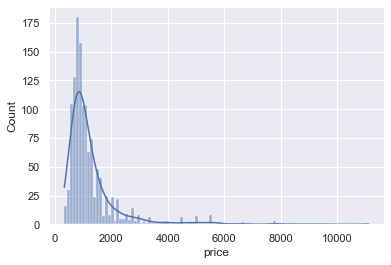

In [7]:
sns.histplot(df.price, kde=True)
plt.show()

Quais são as correlações que temos?

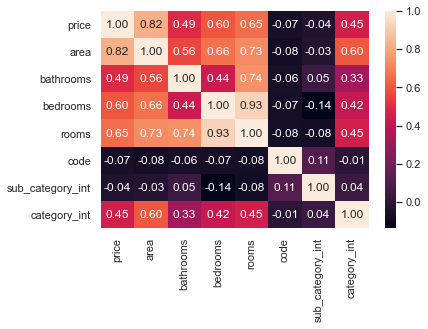

In [8]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

Como esperado, o preço está bastante ligado ao tamanho em área da unidade referida.

Agora, com isso em mente, vamos plotar os valores de locação por área da unidade.

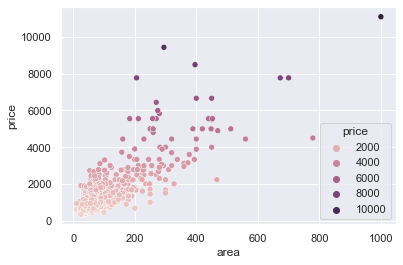

In [9]:
sns.scatterplot(x = df['area'], y = df['price'], hue=df.price)
plt.show()

Olhando para a razão preço/área, obtemos:

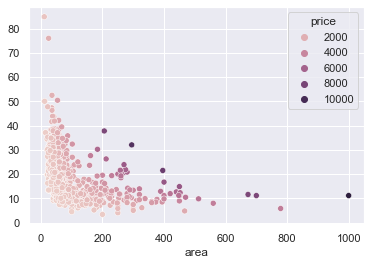

In [10]:
sns.scatterplot(x = df['area'], y = df['price']/df['area'], hue=df.price)
plt.show()

Bastante convidativo para uma regressão linear? Enfim, plotando um boxplot do preço conforme o número de cômodos na unidade. Estou usando o valor padrão para threshold de outliers, isto é, [whis=1.5](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

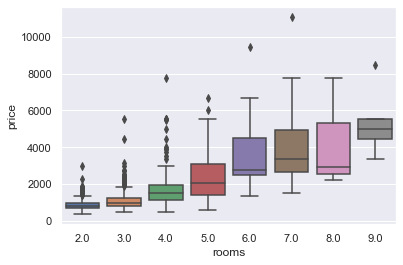

In [11]:
sns.boxplot(x = df['rooms'], y = df['price'])
plt.show()

Vamos dar uma olhada em como as coisas são quando separamos as casas de apartamento. Começamos dividindo os dados em dois novos dataframes.

In [12]:
# Criando dois dataframes 'df_casas' e 'df_apts' para separar casas de apartamentos
df_casas = df[df['category'] == 'Casa']
df_apts = df[df['category'] == 'Apartamento']

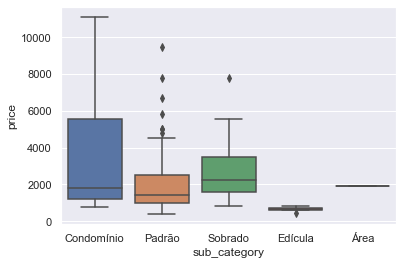

In [13]:
sns.boxplot(x = df_casas['sub_category'], y = df_casas['price'])
plt.show()

Existem pouquíssimas unidades com a sub-categoria igual a Edícula ou Área, mas não vou me preocupar em remover eles do gráfico. Ainda assim, percebe-se um grande número de outliers para a categoria Padrão. Plotando os preços de locação para casas e apartamentos, separadamente.

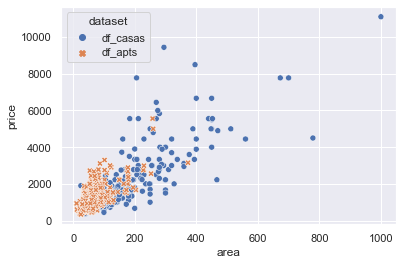

In [14]:
concatenated = pd.concat([df_casas.assign(dataset='df_casas'), df_apts.assign(dataset='df_apts')])
sns.scatterplot(x='area', y='price', data=concatenated, style='dataset', hue='dataset')
plt.show()

Plotando os valores de locação por sub-categoria para as casas. Novamente, observamos vários outliers para a categoria Padrão. Similar ao caso para Apartamentos, devemos nos atentar ao fato de que existem poucas unidades da categoria Cobertura e da categoria Duplex.

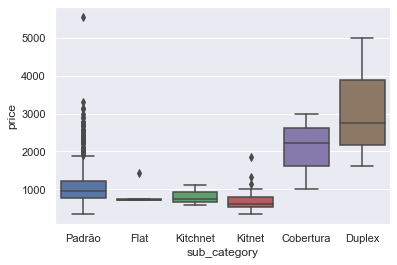

In [15]:
sns.boxplot(x = df_apts['sub_category'], y = df_apts['price'])
plt.show()

Vamos dar uma olhada na questão do preço por localização. Vou agrupar as localizações por meio da média do preço em cada localização, me pareceu algo razoável de se fazer.

In [16]:
# Agrupando por localização e média dos preços de locação para obter os bairros/condomínios
# com mais alto valor de locação.
by_location = df.groupby('location')['price'].mean()
by_location = by_location.sort_values(ascending=False)

Plotando as 5 localizações com o maior preço médio de locação.

<AxesSubplot:ylabel='location'>

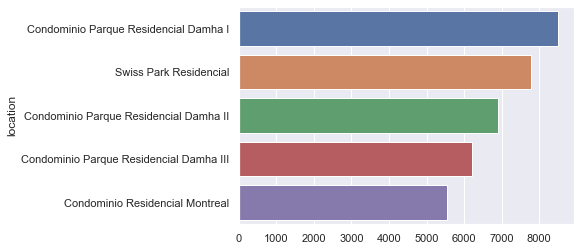

In [17]:
sns.barplot(x=by_location.head().values, y=by_location.head().index, orient='h')

Plotando as 5 localizações com o menor preço médio de locação.

<AxesSubplot:ylabel='location'>

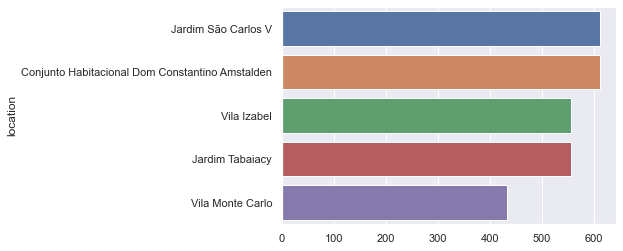

In [18]:
sns.barplot(x=by_location.tail().values, y=by_location.tail().index, orient='h')